In [1]:
from rxnfp.transformer_fingerprints import (
    RXNBERTFingerprintGenerator, get_default_model_and_tokenizer, generate_fingerprints
)

model, tokenizer = get_default_model_and_tokenizer()

rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)

In [12]:
import pandas as pd

biochem_train = pd.read_csv("biochem/raw_train.csv")
biochem_test = pd.read_csv("biochem/raw_test.csv")

In [3]:
biochem_train

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,class,reactants>reagents>production,origin_SMILES
0,995,20891,20891,20891,UNK,O=[N+:13]([O-])[c:12]1[c:7]([S:6][CH2:5][C:3](...,COC(=O)CSc1ncccc1[N+](=O)[O-]>>COC(=O)CSc1ncccc1N
1,996,50578,50578,50578,UNK,O[C:2](=[O:1])[c:3]1[cH:4][nH:5][c:6]2[cH:7][c...,O=C(O)c1c[nH]c2ccccc12>>O=Cc1c[nH]c2ccccc12
2,997,90591,90729,90729,UNK,[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2...,IC(=O)C[C@H](O)CCCCCCCCCCCCC>>IC(=O)CC(=O)CCCC...
3,998,87490,87490,87490,UNK,C=CCOC(=O)[C@@H](C(N)C(=O)OC(C)(C)C)C(O)[c:28]...,C=CCOC(=O)[C@@H](C(N)C(=O)OC(C)(C)C)C(O)c1nc2c...
4,999,52878,52878,52878,UNK,Br[Br:11].[CH3:1][C:2]([CH3:3])([CH3:4])[c:5]1...,BrBr.CC(=O)c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1>>CC...
...,...,...,...,...,...,...,...
88661,89656,14114,14114,14114,UNK,Cl[CH2:14][c:15]1[cH:16][cH:17][cH:18][cH:19][...,CC(C)c1ccc(N(Cc2cn[nH]c2)C(=O)C2CCCc3c(OCc4ccc...
88662,89657,42484,42484,42484,UNK,CCO[C:4]([C:2]([CH3:1])([CH3:3])[n:6]1[cH:7][c...,CCOC(=O)C(C)(C)n1cc([N+](=O)[O-])cn1>>CC(C)(CO...
88663,89658,36000,36000,36000,UNK,O=[CH:10][c:11]1[cH:12][cH:13][c:14]2[c:15]([n...,CCN(CC)CCNC.O=Cc1ccc2c(n1)COC2=O>>CCN(CC)CCN(C...
88664,89659,28409,28409,28409,UNK,Cc1cc(O)cc(O)c1C(=O)[O:14][C@H:13]1[C@@:11]2([...,Cc1cc(O)cc(O)c1C(=O)O[C@@H]1C[C@]2(C)[C@H]3CC(...


In [13]:
plantcyc_train = pd.read_csv("data_plantcyc/raw_train_extended.csv")
plantcyc_valid = pd.read_csv("data_plantcyc/raw_val_extended.csv")
plantcyc_test = pd.read_csv("data_plantcyc/raw_test_extended.csv")

In [18]:
rxns = plantcyc_valid.loc[:, "REACTION-SMILES"]

In [16]:
fps = rxnfp_generator.convert_batch(rxns.to_list())
len(fps[0])

256

In [3]:
from tqdm import tqdm
def get_rxnfps(rxns):
    final_fps = []
    j=0
    if len(rxns) > 1000:
        
        for i in tqdm(range(1000, len(rxns), 1000)):
            
            fps = rxnfp_generator.convert_batch(rxns[j:i])
            j=i
            final_fps.extend(fps)
    else:
        fps = rxnfp_generator.convert_batch(rxns)
        final_fps.extend(fps)
    return final_fps


In [14]:
import os

# Define the directory containing the SMILES files
directory = 'independent_dataset_smiles/'

# List of files to process
files = [
    'afrormosin_reactionSMILES.txt',
    'avenacinA1_reactionSMILES.txt',
    'brucine_reactionSMILES.txt',
    'diaboline_reactionSMILES.txt',
    'falcarindiol_reactionSMILES.txt',
    'lycosantalonol_reactionSMILES.txt',
    'momilactoneB_reactionSMILES.txt',
    'vincamine_reactionSMILES.txt'
]

# Dictionary to store results
results = {}

# Process each file
for file_name in files:
    # Extract compound name from file name
    compound_name = file_name.split('_')[0]
    
    file_path = os.path.join(directory, file_name)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        reactions = [line.strip() for line in lines]

    # Get fingerprints
    fingerprints = get_rxnfps(reactions)
    
    # Store the results with compound name as key
    results[compound_name] = fingerprints

In [15]:
fps_train = get_rxnfps(plantcyc_train.loc[:, "REACTION-SMILES"])

fps_valid = get_rxnfps(plantcyc_valid.loc[:, "REACTION-SMILES"])

fps_test = get_rxnfps(plantcyc_test.loc[:, "REACTION-SMILES"])

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:11<00:00,  5.95s/it]


In [6]:
fps_biochem_train = get_rxnfps(biochem_train.loc[:, "origin_SMILES"])

fps_biochem_test = get_rxnfps(biochem_test.loc[:, "origin_SMILES"])

100%|██████████| 88/88 [07:43<00:00,  5.26s/it]


In [ ]:
import pickle

with open("fingerprints/fps_plantcyc_train.pkl", "wb") as f:
    pickle.dump(fps_train, f)

with open("fingerprints/fps_plantcyc_valid.pkl", "wb") as f:
    pickle.dump(fps_valid, f)

with open("fingerprints/fps_plantcyc_test.pkl", "wb") as f:
    pickle.dump(fps_test, f)

with open("fingerprints/fps_biochem_train.pkl", "wb") as f:
    pickle.dump(fps_biochem_train, f)

with open("fingerprints/fps_biochem_test.pkl", "wb") as f:
    pickle.dump(fps_biochem_test, f)

with open("fingerprints/fps_independent_set.pkl", "wb") as f:
    pickle.dump(results, f)


In [1]:
import pickle

# Load the embeddings from pickle files
with open("fps_plantcyc_train.pkl", "rb") as f:
    fps_train = pickle.load(f)

with open("fps_plantcyc_valid.pkl", "rb") as f:
    fps_valid = pickle.load(f)

with open("fps_plantcyc_test.pkl", "rb") as f:
    fps_test = pickle.load(f)

with open("fps_biochem_train.pkl", "rb") as f:
    fps_biochem_train = pickle.load(f)

with open("fps_biochem_test.pkl", "rb") as f:
    fps_biochem_test = pickle.load(f)

with open("fps_independent_set.pkl", "rb") as f:
    fps_independent_set = pickle.load(f)


In [ ]:
!pip install umap-learn

In [2]:
import numpy as np
import umap
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# Assuming the embeddings are lists of equal-dimensional arrays
# Example:
# fps_train = [embedding1, embedding2, ...]
# fps_valid = [embedding1, embedding2, ...]
# fps_test = [embedding1, embedding2, ...]
# fps_biochem_train = [embedding1, embedding2, ...]
# fps_biochem_test = [embedding1, embedding2, ...]

# Concatenate the lists of embeddings

def generate_umap(to_include, color_map, order_of_labels, method="umap"):
    all_fps = []
    labels_ = []
    for set_ in to_include:
        all_fps.extend(set_[1])
        labels_.extend([set_[0]] * len(set_[1]))

    labels = (labels_)

    # Convert the lists to numpy arrays
    all_fps_np = np.array(all_fps)

    # Run UMAP
    if method=="umap":
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
        embedding = reducer.fit_transform(all_fps_np)
    else:
        # Run t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
        embedding = tsne.fit_transform(all_fps_np)

    # Plotting the UMAP result
    plt.figure(figsize=(10, 8))


    # Plot each set with different colors
    for label in order_of_labels:
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(embedding[indices, 0], embedding[indices, 1], label=label, color=color_map[label], alpha=0.7)
    
    if method=="umap":
        # Add plot details
        plt.legend()
        plt.title('UMAP Projection of Embeddings')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')

        # Show plot
        plt.show()
    else:
        plt.legend()
        plt.xlabel('t-SNE 1')
        plt.ylabel('t-SNE 2')
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)

        # Show plot
        plt.show()


/home/lmartins/miniforge3/envs/retroformer/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Color mapping
color_map = {
    'PlantCyc Train Dataset': 'orange',
    'PlantCyc Test Dataset': 'green',
    'READRetro Retroformer Train Dataset': 'purple',
    'READRetro Retroformer Test Dataset': 'red',
    'Afrormosin': 'cyan',
    'AvenacinA1': 'magenta',
    'Brucine': 'red',
    'Diaboline': 'green',
    'Falcarindiol': 'teal',
    'Lycosantalonol': 'olive',
    'MomilactoneB': 'navy',
    'Vincamine': 'maroon'
}

In [10]:
new_fps_independent_set = {}
for compound in fps_independent_set:
    new_fps_independent_set[compound[0].upper() + compound[1:]] = fps_independent_set[compound]

In [11]:
compound_fingerprints_list = []
compound_names = []

for compound in new_fps_independent_set:
    compound_fingerprints_list.append((compound, new_fps_independent_set[compound]))
    compound_names.append(compound)

/home/lmartins/miniforge3/envs/retroformer/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


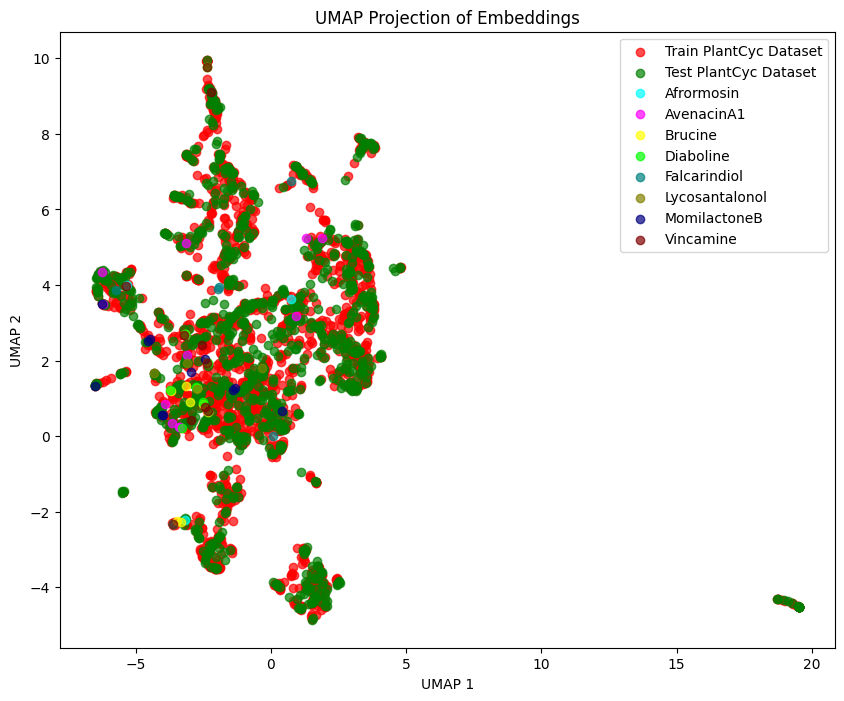

In [6]:
generate_umap([("Test PlantCyc Dataset", fps_test), ("Train PlantCyc Dataset", fps_train)] + compound_fingerprints_list, color_map, ["Train PlantCyc Dataset", "Test PlantCyc Dataset"] + compound_names)

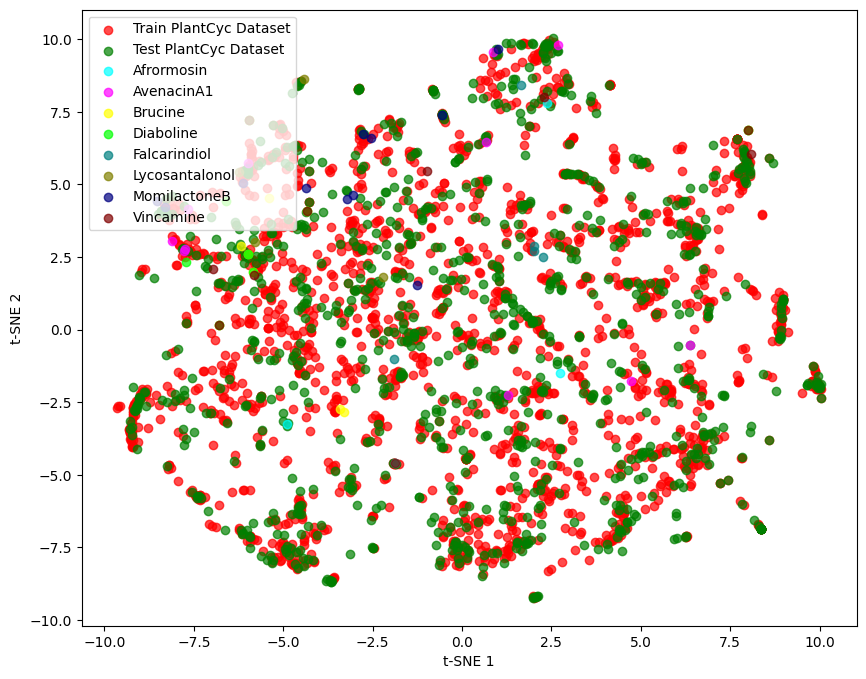

In [7]:
generate_umap([("Test PlantCyc Dataset", fps_test), ("Train PlantCyc Dataset", fps_train)] + compound_fingerprints_list, color_map, ["Train PlantCyc Dataset", "Test PlantCyc Dataset"] + compound_names, method="tsne")

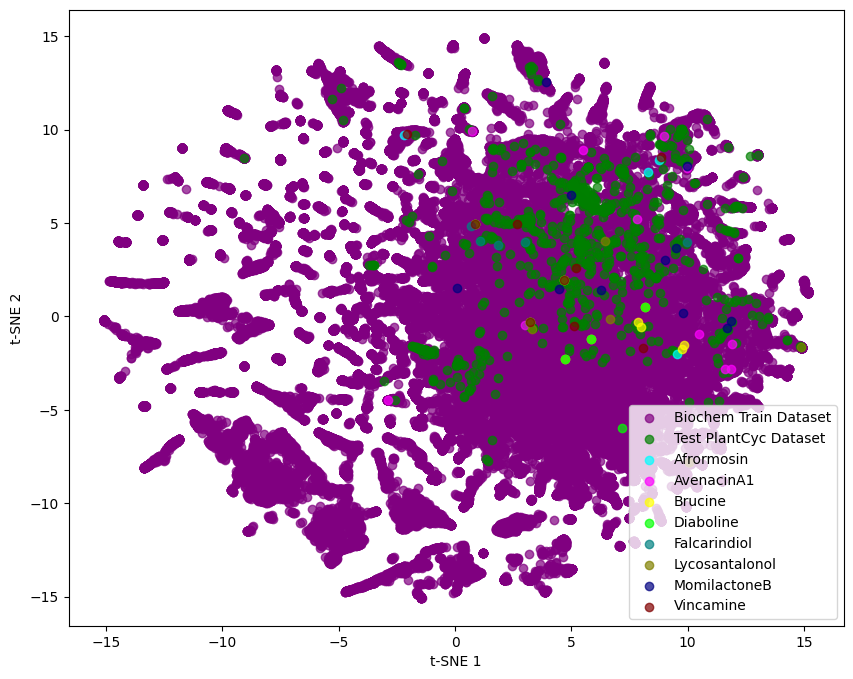

In [8]:
generate_umap([("Biochem Train Dataset", fps_biochem_train), ("Test PlantCyc Dataset", fps_test)] + compound_fingerprints_list, color_map, ["Biochem Train Dataset", "Test PlantCyc Dataset"]+ compound_names, method="tsne")

In [23]:
generate_umap([("Biochem Train Dataset", fps_biochem_train), ("Biochem Test Dataset", fps_biochem_test), ("Test PlantCyc Dataset", fps_test), ("Train PlantCyc Dataset", fps_train)] + compound_fingerprints_list, color_map, ["Biochem Train Dataset", "Biochem Test Dataset", "Train PlantCyc Dataset", "Test PlantCyc Dataset"]+ compound_names, method="tsne")

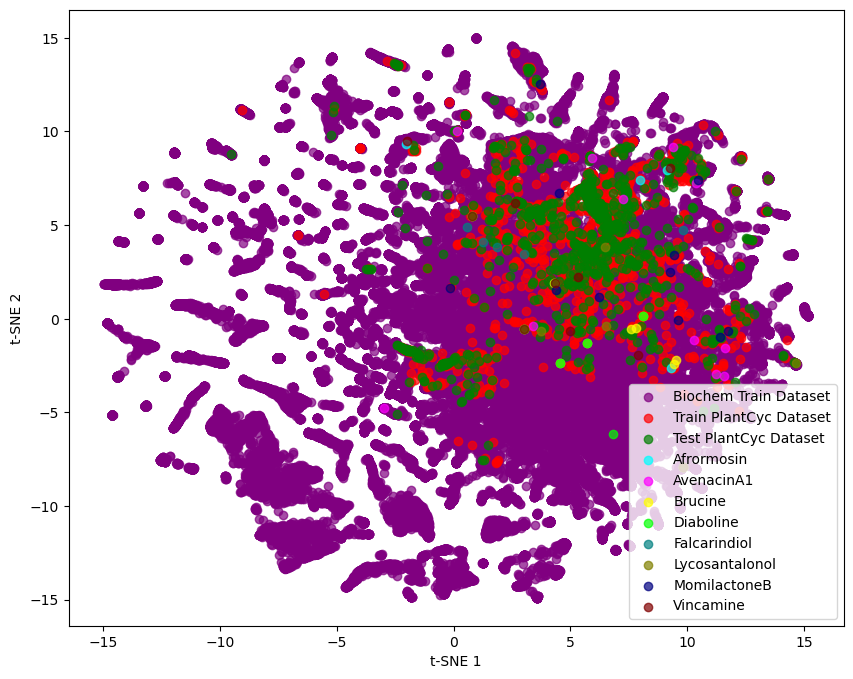

In [21]:
generate_umap([("Biochem Train Dataset", fps_biochem_train), ("Test PlantCyc Dataset", fps_test), ("Train PlantCyc Dataset", fps_train)] + compound_fingerprints_list, color_map, ["Biochem Train Dataset", "Train PlantCyc Dataset", "Test PlantCyc Dataset"]+ compound_names, method="tsne")

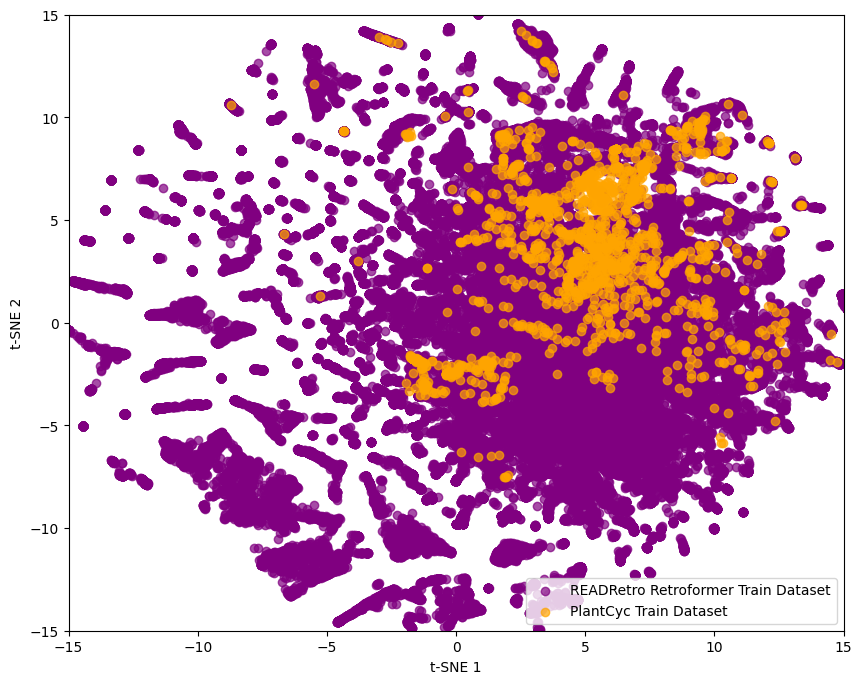

In [14]:
generate_umap([("READRetro Retroformer Train Dataset", fps_biochem_train), ("PlantCyc Train Dataset", fps_train)] + compound_fingerprints_list, color_map, ["READRetro Retroformer Train Dataset", "PlantCyc Train Dataset"], method="tsne")

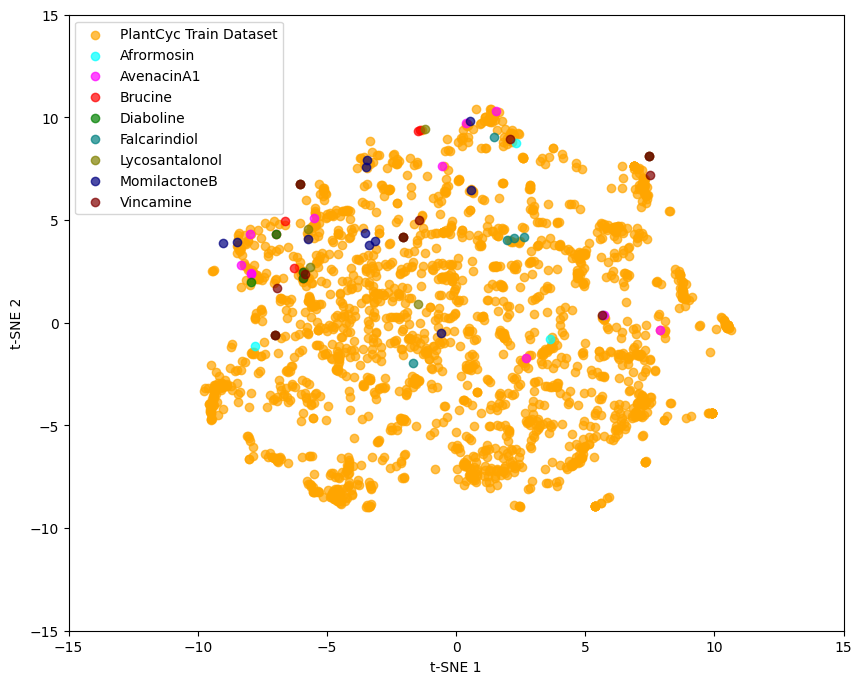

In [12]:
generate_umap([("PlantCyc Train Dataset", fps_train)] + compound_fingerprints_list, color_map, ["PlantCyc Train Dataset"]+ compound_names, method="tsne")

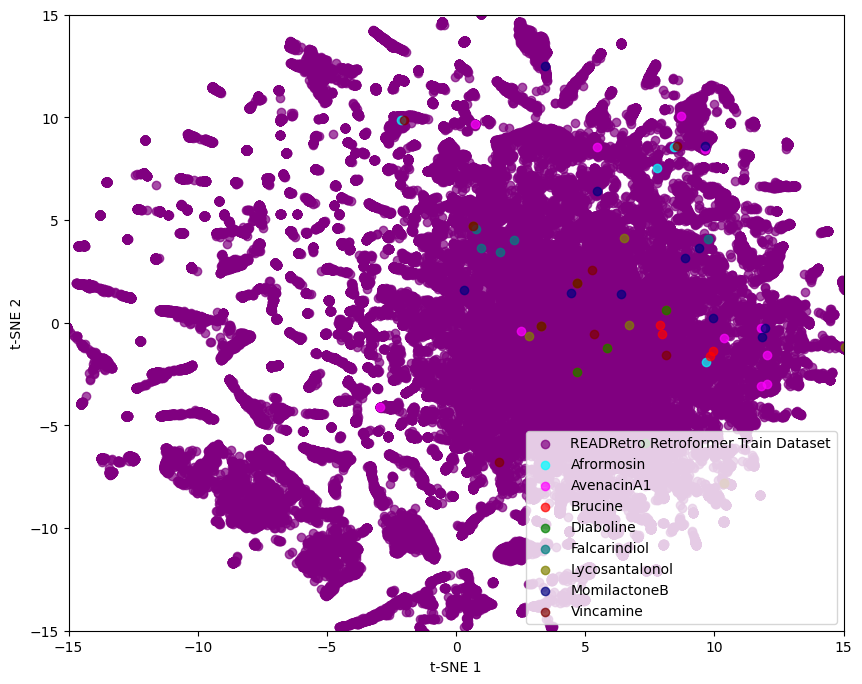

In [15]:
generate_umap([("READRetro Retroformer Train Dataset", fps_biochem_train)] + compound_fingerprints_list, color_map, ["READRetro Retroformer Train Dataset"]+ compound_names, method="tsne")